In [3]:
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns
import joblib

from pycaret.utils          import version
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

## EDA

In [4]:
url = 'https://raw.githubusercontent.com/SaimNazir/Applied-ML/main/Fault_Variables_dataset.csv'

df = pd.read_csv(url, sep='\t', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0


In [5]:
url_2 = 'https://raw.githubusercontent.com/SaimNazir/Applied-ML/main/Fault_Column_Names.txt'

df_cols = pd.read_csv(url_2, sep=" ", header=None)
df_cols.head(2)

,0
0,X_Minimum
1,X_Maximum


In [6]:
ls = df_cols.iloc[:, -1].tolist()
print(ls)

['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


In [7]:
df.columns = ls
print(df.shape)
df.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [8]:
def Overview(df, sort_by_missing=True):
    # Preliminary data overview
    uniques = df.nunique()
    dtypes = df.dtypes
    total = df.isnull().sum().sort_values()
    percent = (df.isnull().sum() / df.isnull().count()).sort_values() * 100

    if len(df.dropna()) > 0:
        sample = df.dropna().iloc[0].astype(str).apply(lambda x: x[:30])
    else:
        sample = df.iloc[0].astype(str).apply(lambda x: x[:30])

    data_overview = [sample, uniques, dtypes, total, percent]
    keys = ["Sample", "Count uniques", "dtype", "Count missing", "Pct. missing"]

    overview_df = pd.concat(data_overview, keys=keys, axis=1, sort=False)
    if sort_by_missing:
        overview_df = overview_df.sort_values(by="Pct. missing", ascending=False)
    overview_df = overview_df.round(1)
    return overview_df

overview = Overview(df)

overview

,Sample,Count uniques,dtype,Count missing,Pct. missing
X_Minimum,42.0,962,int64,0,0.0
Luminosity_Index,-0.2913,1522,float64,0,0.0
Edges_Y_Index,1.0,648,float64,0,0.0
Outside_Global_Index,1.0,3,float64,0,0.0
LogOfAreas,2.4265,914,float64,0,0.0
Log_X_Index,0.9031,183,float64,0,0.0
Log_Y_Index,1.6435,217,float64,0,0.0
Orientation_Index,0.8182,918,float64,0,0.0
SigmoidOfAreas,0.5822,388,float64,0,0.0
X_Maximum,50.0,994,int64,0,0.0


In [9]:
#Targets
"""1. Pastry
2. Z_Scratch
3. K_Scatch
4. Stains
5. Dirtiness
6. Bumps
7. Other_Faults
"""

df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].apply(pd.Series.value_counts)

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1783,1751,1550,1869,1886,1539,1268
1,158,190,391,72,55,402,673


In [10]:
df_copy = df.copy()
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

targets_df = df_copy[targets]
targets_df.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [11]:
print(targets_df.shape)
array = targets_df.to_numpy()

(1941, 7)


In [12]:
array_unique = np.where(array==1)[1]
array_unique

array([0, 0, 0, ..., 6, 6, 6])

In [13]:
len(array_unique)

1941

In [14]:
df_copy['defect_type']=pd.Series(array_unique)
df_copy.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,defect_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,0


In [15]:
df_copy.drop(targets, inplace=True, axis=1)

In [16]:
df_copy.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


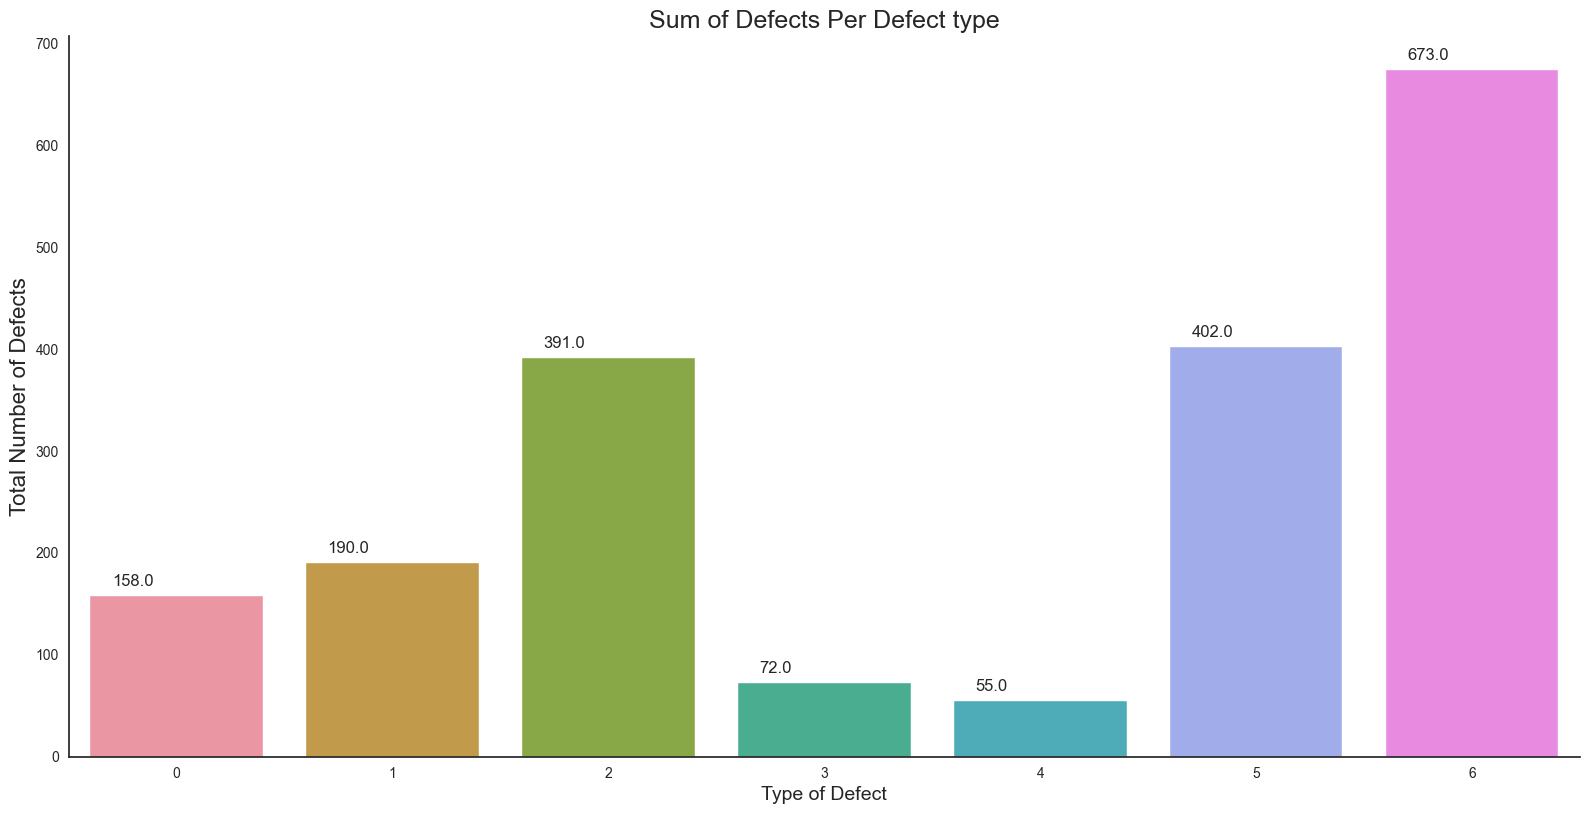

In [17]:
sns.set_style("white")
g = sns.catplot(data=df_copy, x="defect_type", kind="count",
                   height=8, aspect=2)
g.ax.xaxis.set_label_text("Type of Defect",fontdict= {'size':14})
g.ax.yaxis.set_label_text("Total Number of Defects", fontdict= {'size':16})
g.ax.set_title("Sum of Defects Per Defect type",fontdict= {'size':18})

# to get the counts on the top heads of the bar
for n in g.ax.patches:
    g.ax.annotate((n.get_height()), (n.get_x()+0.1, n.get_height()+10))

In [37]:
"""
class_array = df_copy['defect_type'].value_counts().to_numpy()
print(class_array)
df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].apply(pd.Series.value_counts)


# Plotting the classes
objects = ('Other_Faults', 'Bumps', 'K_Scatch', 'Z_Scratch', 'Pastry', 'Stains', 'Dirtiness')
y_pos = np.arange(len(objects))

count = np.array([
    class_array[0], 
    class_array[1], 
    class_array[2], 
    class_array[3], 
    class_array[4], 
    class_array[5],
    class_array[6]
    ])
    
 0 = other_Faults
 1 = Bumps
 2 = K_Scratch
 3 = Z_Scratch
 4 = Pastry
 5 = Stains
 6 = Dirtiness
fig, ax = plt.subplots(figsize=(10, 7))


plt.bar(y_pos, count, align='center', alpha= 0.9)
plt.xticks(y_pos, objects)

ax.bar_label(ax.containers[0])


plt.title('Defect Type')
#plt.savefig("/home/saim/Desktop/class_imb.png")

fig.tight_layout()
"""

'\nclass_array = df_copy[\'defect_type\'].value_counts().to_numpy()\nprint(class_array)\ndf[[\'Pastry\', \'Z_Scratch\', \'K_Scatch\', \'Stains\', \'Dirtiness\', \'Bumps\', \'Other_Faults\']].apply(pd.Series.value_counts)\n\n\n# Plotting the classes\nobjects = (\'Other_Faults\', \'Bumps\', \'K_Scatch\', \'Z_Scratch\', \'Pastry\', \'Stains\', \'Dirtiness\')\ny_pos = np.arange(len(objects))\n\ncount = np.array([\n    class_array[0], \n    class_array[1], \n    class_array[2], \n    class_array[3], \n    class_array[4], \n    class_array[5],\n    class_array[6]\n    ])\n\nfig, ax = plt.subplots(figsize=(10, 7))\n\n\nplt.bar(y_pos, count, align=\'center\', alpha= 0.9)\nplt.xticks(y_pos, objects)\n\nax.bar_label(ax.containers[0])\n\n\nplt.title(\'Defect Type\')\n#plt.savefig("/home/saim/Desktop/class_imb.png")\n\nfig.tight_layout()\n'

## Modelling

In [18]:
version()

'3.0.0.rc4'

In [19]:
#init Setup
s = setup(data=df_copy, normalize=True)

,Description,Value
0,Session id,3827
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 28)"
5,Transformed train set shape,"(1358, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [20]:
#clf = setup(df_copy, target='defect_type', session_id=42)

In [21]:
exp1 = ClassificationExperiment()
exp1.setup(df_copy, session_id=1, target='defect_type')

,Description,Value
0,Session id,1
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 28)"
5,Transformed train set shape,"(1358, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [19]:
exp1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7938,0.9439,0.7938,0.8010,0.7928,0.7331,0.7346,1.0130
et,Extra Trees Classifier,0.7842,0.9375,0.7842,0.7914,0.7820,0.7199,0.7218,0.2190
gbc,Gradient Boosting Classifier,0.7828,0.9397,0.7828,0.7949,0.7811,0.7167,0.7198,2.8510
rf,Random Forest Classifier,0.7651,0.9344,0.7651,0.7754,0.7635,0.6934,0.6965,0.2670
dt,Decision Tree Classifier,0.6944,0.7965,0.6944,0.7018,0.6932,0.6070,0.6094,0.0370
lda,Linear Discriminant Analysis,0.6848,0.8883,0.6848,0.6999,0.6865,0.5966,0.5991,0.0360
ridge,Ridge Classifier,0.6628,0.0000,0.6628,0.6587,0.6489,0.5556,0.5606,0.0280
qda,Quadratic Discriminant Analysis,0.6421,0.8865,0.6421,0.7033,0.6263,0.5579,0.5825,0.0360
lr,Logistic Regression,0.5066,0.7515,0.5066,0.4181,0.4216,0.2875,0.3460,1.2790
ada,Ada Boost Classifier,0.5059,0.6057,0.5059,0.3756,0.4043,0.3042,0.3958,0.1360


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
exp2 = ClassificationExperiment()
exp2.setup(df_copy, session_id=2, target='defect_type', remove_outliers=True, outliers_threshold=0.03)

,Description,Value
0,Session id,2
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1907, 28)"
5,Transformed train set shape,"(1322, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [21]:
exp2.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8012,0.9492,0.8012,0.8057,0.7986,0.7430,0.7445,0.8440
gbc,Gradient Boosting Classifier,0.7894,0.9457,0.7894,0.7976,0.7887,0.7266,0.7285,2.3810
rf,Random Forest Classifier,0.7791,0.9394,0.7791,0.7889,0.7778,0.7123,0.7149,0.2540
et,Extra Trees Classifier,0.7783,0.9407,0.7783,0.7863,0.7759,0.7118,0.7145,0.2000
dt,Decision Tree Classifier,0.7135,0.8093,0.7135,0.7185,0.7128,0.6316,0.6327,0.0490
lda,Linear Discriminant Analysis,0.6849,0.8825,0.6849,0.6976,0.6849,0.5971,0.5991,0.0400
ridge,Ridge Classifier,0.6790,0.0000,0.6790,0.6780,0.6665,0.5770,0.5811,0.0330
qda,Quadratic Discriminant Analysis,0.6304,0.8762,0.6304,0.6906,0.6290,0.5437,0.5603,0.0430
nb,Naive Bayes,0.5058,0.7989,0.5058,0.5477,0.4461,0.3972,0.4335,0.0470
lr,Logistic Regression,0.5015,0.7417,0.5015,0.3970,0.3982,0.2762,0.3467,0.9050


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
exp3 = ClassificationExperiment()
exp3.setup(df_copy, session_id=3, target='defect_type', pca=True)

,Description,Value
0,Session id,3
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 28)"
5,Transformed train set shape,"(1358, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [23]:
exp3.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7681,0.9311,0.7681,0.7744,0.7619,0.6959,0.6995,0.2150
lightgbm,Light Gradient Boosting Machine,0.7585,0.9297,0.7585,0.7630,0.7533,0.6841,0.6874,1.2810
rf,Random Forest Classifier,0.7533,0.9265,0.7533,0.7610,0.7447,0.6754,0.6806,0.2770
gbc,Gradient Boosting Classifier,0.7357,0.9176,0.7357,0.7453,0.7313,0.6538,0.6576,4.0280
lda,Linear Discriminant Analysis,0.6812,0.8842,0.6812,0.6904,0.6823,0.5908,0.5919,0.0390
ridge,Ridge Classifier,0.6671,0.0000,0.6671,0.6591,0.6507,0.5607,0.5648,0.0270
dt,Decision Tree Classifier,0.6480,0.7671,0.6480,0.6547,0.6464,0.5466,0.5481,0.0440
qda,Quadratic Discriminant Analysis,0.6311,0.8809,0.6311,0.6903,0.6216,0.5459,0.5677,0.0410
lr,Logistic Regression,0.5148,0.7594,0.5148,0.4726,0.4732,0.3417,0.3575,0.6380
knn,K Neighbors Classifier,0.4367,0.6802,0.4367,0.4188,0.4250,0.2633,0.2647,0.0840


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3, verbose=0, warm_start=False)

In [25]:
exp4 = ClassificationExperiment()
exp4.setup(df_copy, session_id=4, target='defect_type', feature_selection=True)

,Description,Value
0,Session id,4
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 11)"
5,Transformed train set shape,"(1358, 11)"
6,Transformed test set shape,"(583, 11)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [26]:
exp4.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7968,0.9474,0.7968,0.8058,0.7920,0.7353,0.7382,0.3920
rf,Random Forest Classifier,0.7843,0.9441,0.7843,0.7926,0.7788,0.7185,0.7217,0.4840
lightgbm,Light Gradient Boosting Machine,0.7820,0.9423,0.7820,0.7839,0.7778,0.7170,0.7189,0.7250
gbc,Gradient Boosting Classifier,0.7798,0.9373,0.7798,0.7841,0.7774,0.7137,0.7156,1.6700
dt,Decision Tree Classifier,0.6848,0.7918,0.6848,0.6886,0.6835,0.5952,0.5962,0.2130
qda,Quadratic Discriminant Analysis,0.6546,0.8837,0.6546,0.6669,0.6390,0.5661,0.5777,0.2120
lda,Linear Discriminant Analysis,0.5817,0.8394,0.5817,0.5961,0.5796,0.4573,0.4599,0.2340
ridge,Ridge Classifier,0.5442,0.0000,0.5442,0.5221,0.5083,0.3756,0.3885,0.1080
lr,Logistic Regression,0.4956,0.7387,0.4956,0.4042,0.4204,0.2855,0.3194,1.9590
nb,Naive Bayes,0.4912,0.8043,0.4912,0.5491,0.4568,0.3795,0.4042,0.2170


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4, verbose=0, warm_start=False)

In [27]:
exp5 = ClassificationExperiment()
exp5.setup(df_copy, session_id=4, target='defect_type', normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,4
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 28)"
5,Transformed train set shape,"(1358, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [28]:
exp5.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8019,0.9502,0.8019,0.8091,0.7992,0.7425,0.7448,0.8600
gbc,Gradient Boosting Classifier,0.7872,0.9437,0.7872,0.7966,0.7865,0.7232,0.7248,2.7320
rf,Random Forest Classifier,0.7850,0.9414,0.7850,0.7935,0.7832,0.7195,0.7219,0.2750
et,Extra Trees Classifier,0.7798,0.9424,0.7798,0.7863,0.7786,0.7140,0.7155,0.2030
dt,Decision Tree Classifier,0.7334,0.8223,0.7334,0.7378,0.7327,0.6567,0.6576,0.0390
lr,Logistic Regression,0.7033,0.8909,0.7033,0.7092,0.6985,0.6138,0.6162,0.2040
knn,K Neighbors Classifier,0.6973,0.8784,0.6973,0.7044,0.6937,0.6169,0.6201,0.0830
lda,Linear Discriminant Analysis,0.6952,0.8891,0.6952,0.7070,0.6965,0.6118,0.6135,0.0310
svm,SVM - Linear Kernel,0.6922,0.0000,0.6922,0.7191,0.6820,0.6019,0.6125,0.0480
ridge,Ridge Classifier,0.6620,0.0000,0.6620,0.6554,0.6454,0.5543,0.5584,0.0320


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
exp6 = ClassificationExperiment()
exp6.setup(df_copy, session_id=6, target='defect_type', normalize=True, normalize_method='maxabs')

,Description,Value
0,Session id,6
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 28)"
5,Transformed train set shape,"(1358, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [30]:
exp6.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7842,0.9412,0.7842,0.7898,0.7823,0.7199,0.7214,0.8350
gbc,Gradient Boosting Classifier,0.7753,0.9357,0.7753,0.7843,0.7743,0.7086,0.7103,2.4580
et,Extra Trees Classifier,0.7695,0.9350,0.7695,0.7769,0.7675,0.7010,0.7031,0.1800
rf,Random Forest Classifier,0.7607,0.9313,0.7607,0.7675,0.7569,0.6878,0.6907,0.2610
lda,Linear Discriminant Analysis,0.6885,0.8821,0.6885,0.7003,0.6904,0.6009,0.6023,0.0280
knn,K Neighbors Classifier,0.6871,0.8747,0.6871,0.6986,0.6844,0.6060,0.6097,0.0750
dt,Decision Tree Classifier,0.6855,0.7914,0.6855,0.6898,0.6825,0.5957,0.5974,0.0380
lr,Logistic Regression,0.6760,0.8805,0.6760,0.6705,0.6669,0.5787,0.5806,0.3670
svm,SVM - Linear Kernel,0.6406,0.0000,0.6406,0.6627,0.6236,0.5423,0.5565,0.0430
qda,Quadratic Discriminant Analysis,0.6355,0.8779,0.6355,0.7065,0.6302,0.5491,0.5705,0.0300


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
exp7 = ClassificationExperiment()
exp7.setup(df_copy, session_id=7, target='defect_type', normalize=True, normalize_method='robust')

,Description,Value
0,Session id,7
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 28)"
5,Transformed train set shape,"(1358, 28)"
6,Transformed test set shape,"(583, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [32]:
exp7.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7953,0.9433,0.7953,0.8014,0.7929,0.7337,0.7355,2.4150
lightgbm,Light Gradient Boosting Machine,0.7894,0.9412,0.7894,0.7935,0.7883,0.7275,0.7287,0.9620
rf,Random Forest Classifier,0.7717,0.9336,0.7717,0.7810,0.7714,0.7031,0.7050,0.3120
et,Extra Trees Classifier,0.7673,0.9358,0.7673,0.7795,0.7676,0.6980,0.6998,0.2180
knn,K Neighbors Classifier,0.7305,0.9046,0.7305,0.7361,0.7267,0.6568,0.6597,0.0810
lr,Logistic Regression,0.7275,0.9058,0.7275,0.7317,0.7248,0.6475,0.6490,0.4170
dt,Decision Tree Classifier,0.7172,0.8115,0.7172,0.7205,0.7151,0.6360,0.6372,0.0470
lda,Linear Discriminant Analysis,0.6959,0.8913,0.6959,0.7082,0.6968,0.6118,0.6136,0.0360
ridge,Ridge Classifier,0.6782,0.0000,0.6782,0.6701,0.6663,0.5774,0.5805,0.0300
svm,SVM - Linear Kernel,0.6429,0.0000,0.6429,0.6698,0.6366,0.5386,0.5463,0.0500


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [22]:
exp8 = ClassificationExperiment()
exp8.setup(df_copy, session_id=8, target='defect_type', normalize=True, normalize_method='maxabs', pca=True, pca_components=15)

,Description,Value
0,Session id,8
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 16)"
5,Transformed train set shape,"(1358, 16)"
6,Transformed test set shape,"(583, 16)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [58]:
exp8.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7437,0.9202,0.7437,0.7546,0.7416,0.6639,0.6672,0.3160
et,Extra Trees Classifier,0.7423,0.9206,0.7423,0.7557,0.7402,0.6625,0.6652,0.2200
lightgbm,Light Gradient Boosting Machine,0.7364,0.9191,0.7364,0.7447,0.7344,0.6564,0.6578,0.9700
gbc,Gradient Boosting Classifier,0.7150,0.9060,0.7150,0.7239,0.7143,0.6282,0.6300,2.6460
qda,Quadratic Discriminant Analysis,0.6973,0.9025,0.6973,0.7337,0.6986,0.6208,0.6290,0.0520
svm,SVM - Linear Kernel,0.6730,0.0000,0.6730,0.6793,0.6636,0.5826,0.5888,0.0630
lda,Linear Discriminant Analysis,0.6730,0.8822,0.6730,0.6874,0.6752,0.5847,0.5866,0.0490
nb,Naive Bayes,0.6716,0.8792,0.6716,0.6923,0.6734,0.5858,0.5895,0.0550
knn,K Neighbors Classifier,0.6635,0.8706,0.6635,0.6749,0.6632,0.5749,0.5774,0.1440
lr,Logistic Regression,0.6620,0.8828,0.6620,0.6660,0.6568,0.5602,0.5623,0.9620


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8, verbose=0, warm_start=False)

In [59]:
exp9 = ClassificationExperiment()
exp9.setup(df_copy, session_id=8, target='defect_type', normalize=True, normalize_method='maxabs', pca=True, pca_components=0.9)

,Description,Value
0,Session id,8
1,Target,defect_type
2,Target type,Multiclass
3,Original data shape,"(1941, 28)"
4,Transformed data shape,"(1941, 8)"
5,Transformed train set shape,"(1358, 8)"
6,Transformed test set shape,"(583, 8)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


In [60]:
exp9.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6833,0.8932,0.6833,0.6931,0.6818,0.5870,0.5893,0.5310
rf,Random Forest Classifier,0.6819,0.8921,0.6819,0.6930,0.6816,0.5866,0.5887,0.2510
et,Extra Trees Classifier,0.6737,0.8897,0.6737,0.6821,0.6719,0.5761,0.5782,0.2150
gbc,Gradient Boosting Classifier,0.6495,0.8771,0.6495,0.6580,0.6459,0.5409,0.5444,1.0820
nb,Naive Bayes,0.6399,0.8590,0.6399,0.6529,0.6384,0.5438,0.5464,0.0420
qda,Quadratic Discriminant Analysis,0.6340,0.8685,0.6340,0.6582,0.6308,0.5460,0.5528,0.0620
knn,K Neighbors Classifier,0.6318,0.8521,0.6318,0.6423,0.6304,0.5341,0.5365,0.0820
lda,Linear Discriminant Analysis,0.6149,0.8515,0.6149,0.6280,0.6144,0.5049,0.5074,0.0400
lr,Logistic Regression,0.6119,0.8580,0.6119,0.6183,0.5974,0.4867,0.4928,0.7610
dt,Decision Tree Classifier,0.5854,0.7320,0.5854,0.5949,0.5852,0.4702,0.4718,0.0370


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Evaluation

In [23]:
best_model = exp8.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7437,0.9202,0.7437,0.7546,0.7416,0.6639,0.6672,0.2670
et,Extra Trees Classifier,0.7423,0.9206,0.7423,0.7557,0.7402,0.6625,0.6652,0.2150
lightgbm,Light Gradient Boosting Machine,0.7364,0.9191,0.7364,0.7447,0.7344,0.6564,0.6578,0.8780
gbc,Gradient Boosting Classifier,0.7150,0.9060,0.7150,0.7239,0.7143,0.6282,0.6300,2.2850
qda,Quadratic Discriminant Analysis,0.6973,0.9025,0.6973,0.7337,0.6986,0.6208,0.6290,0.0400
svm,SVM - Linear Kernel,0.6730,0.0000,0.6730,0.6793,0.6636,0.5826,0.5888,0.0480
lda,Linear Discriminant Analysis,0.6730,0.8822,0.6730,0.6874,0.6752,0.5847,0.5866,0.0400
nb,Naive Bayes,0.6716,0.8792,0.6716,0.6923,0.6734,0.5858,0.5895,0.0390
knn,K Neighbors Classifier,0.6635,0.8706,0.6635,0.6749,0.6632,0.5749,0.5774,0.0900
lr,Logistic Regression,0.6620,0.8828,0.6620,0.6660,0.6568,0.5602,0.5623,0.6620


In [24]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8, verbose=0, warm_start=False)

In [27]:
tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7206,0.9026,0.7206,0.7518,0.7219,0.6461,0.6530
1,0.7941,0.9519,0.7941,0.8046,0.7954,0.7389,0.7418
2,0.7206,0.9182,0.7206,0.7430,0.7255,0.6418,0.6432
3,0.7647,0.9242,0.7647,0.7841,0.7654,0.7050,0.7094
4,0.7353,0.9244,0.7353,0.7744,0.7430,0.6637,0.6698
5,0.7794,0.9393,0.7794,0.7917,0.7790,0.7230,0.7266
6,0.7500,0.9280,0.7500,0.7558,0.7505,0.6760,0.6769
7,0.7500,0.9275,0.7500,0.7556,0.7465,0.6849,0.6882
8,0.7481,0.9295,0.7481,0.7532,0.7484,0.6793,0.6805


Fitting 10 folds for each of 10 candidates, totalling 100 fits


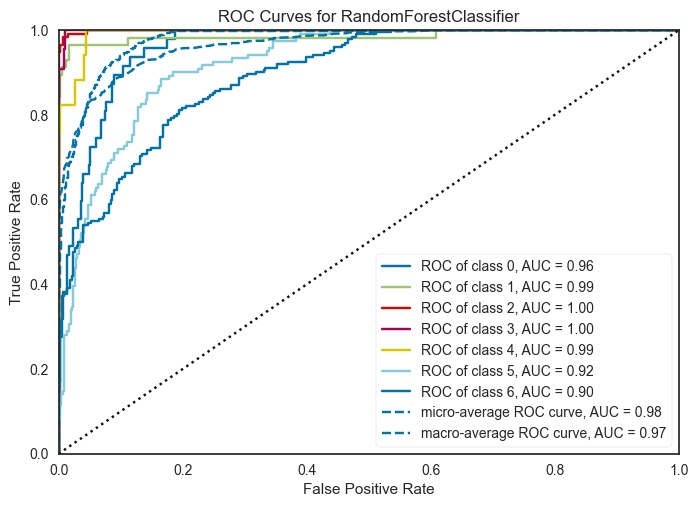

In [28]:
plot_model(tuned)

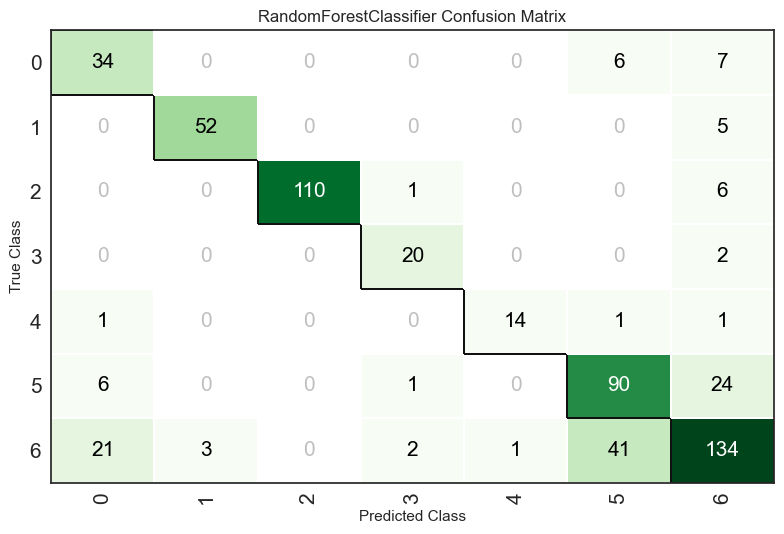

In [29]:
plot_model(tuned, plot = 'confusion_matrix')

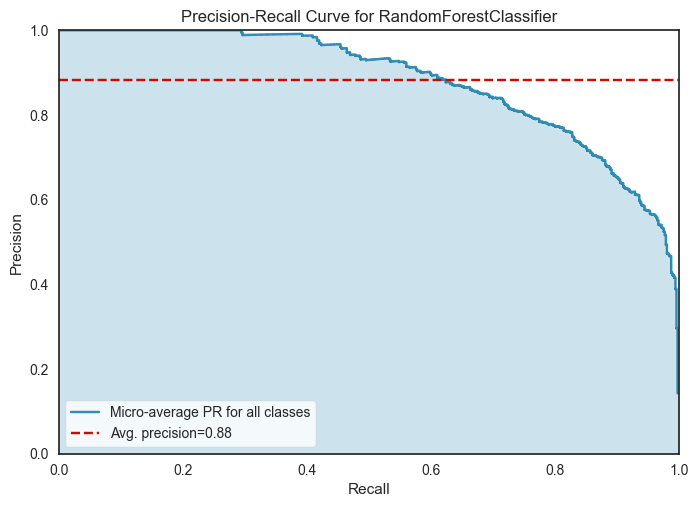

In [30]:
plot_model(tuned, plot = 'pr') 

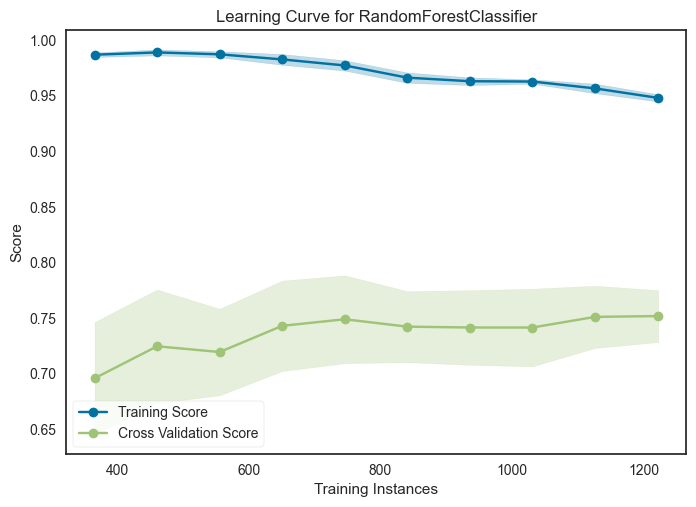

In [34]:
plot_model(tuned, plot = 'learning')

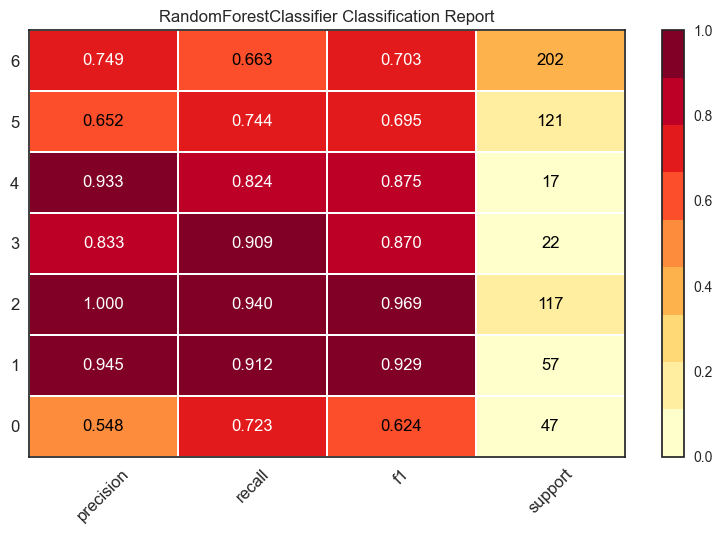

In [31]:
plot_model(tuned, plot = 'class_report')

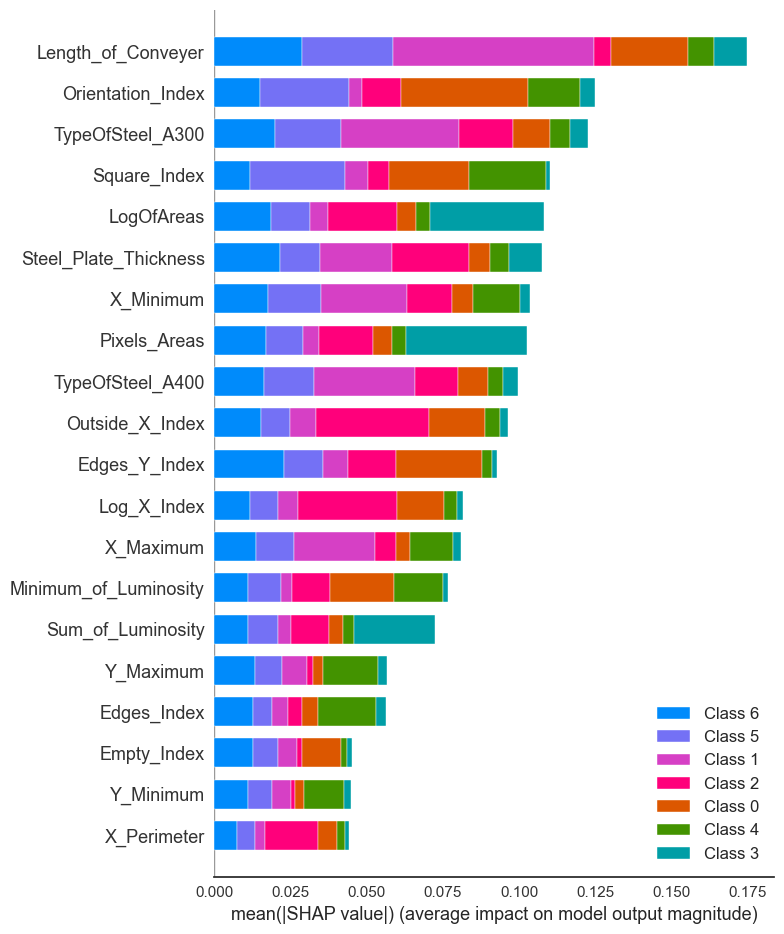

In [32]:
interpret_model(tuned)

In [33]:
joblib.dump(tuned, 'model.joblib')

['model.joblib']

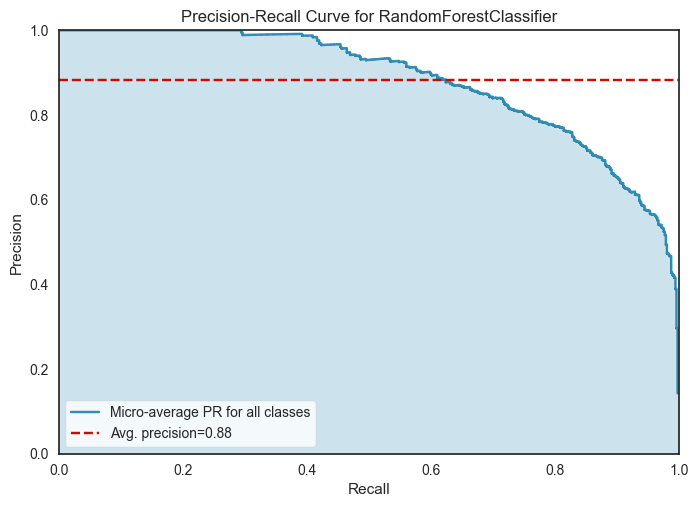

In [38]:
w = plot_model(tuned, plot = 'pr') 